In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [41]:
# reading the dataset using read_csv
df = pd.read_csv("stock_data.csv", parse_dates=True, index_col="Date")

# displaying the first five rows of dataset
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-01,137.454012,153.142919,124.942215,96.718624,31352
2022-01-02,195.071431,213.641041,85.889798,159.076102,65069
2022-01-03,173.199394,181.435598,91.314010,160.282566,24397
2022-01-04,159.865848,200.857069,142.898793,172.865887,51555
2022-01-05,115.601864,240.756647,122.450034,184.391873,56959


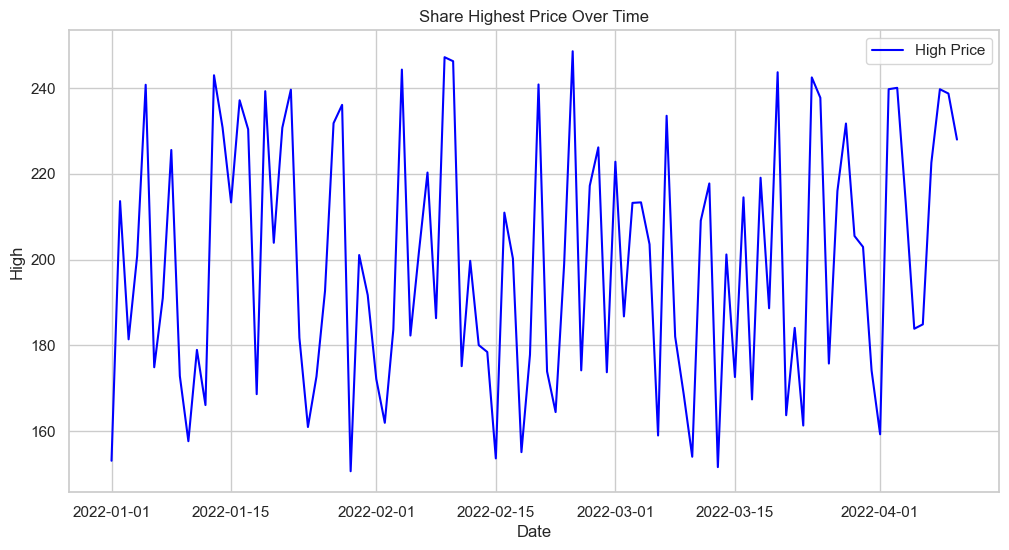

In [45]:
# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

/var/folders/cj/008z29mx343881p0xj45k9_80000gn/T/ipykernel_98441/1398141387.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').mean(numeric_only=True)  # Resampling to monthly frequency, using mean as an aggregation function


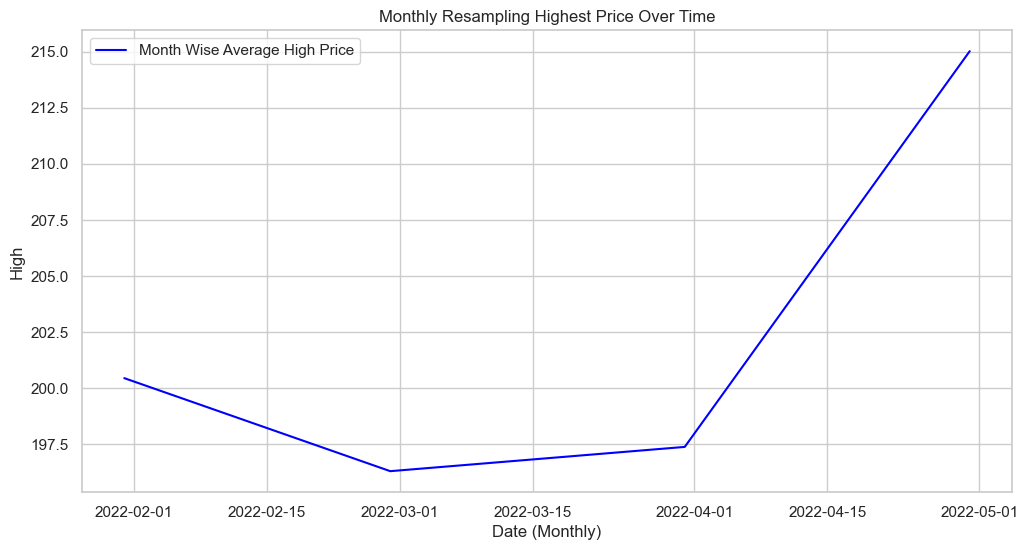

In [47]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.resample('M').mean(numeric_only=True)  # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()

# This code is modified by Susobhan Akhuli

'Date' is already the index or not present in the DataFrame.


<Figure size 1200x600 with 0 Axes>

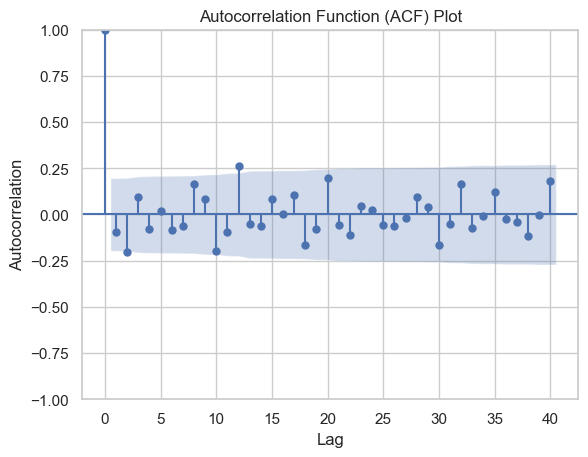

In [49]:
# Check if 'Date' is already the index
if 'Date' not in df.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    df.set_index('Date', inplace=True)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

# This code is modified by Susobhan Akhuli

In [51]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -9.88148440863174
p-value: 3.75980243850051e-17
Critical Values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


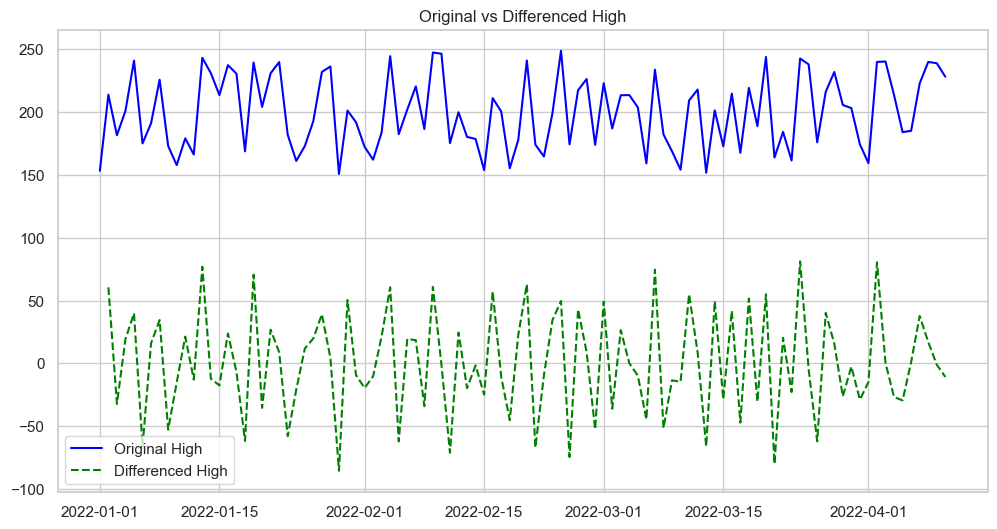

In [55]:
# Differencing
df['high_diff'] = df['High'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

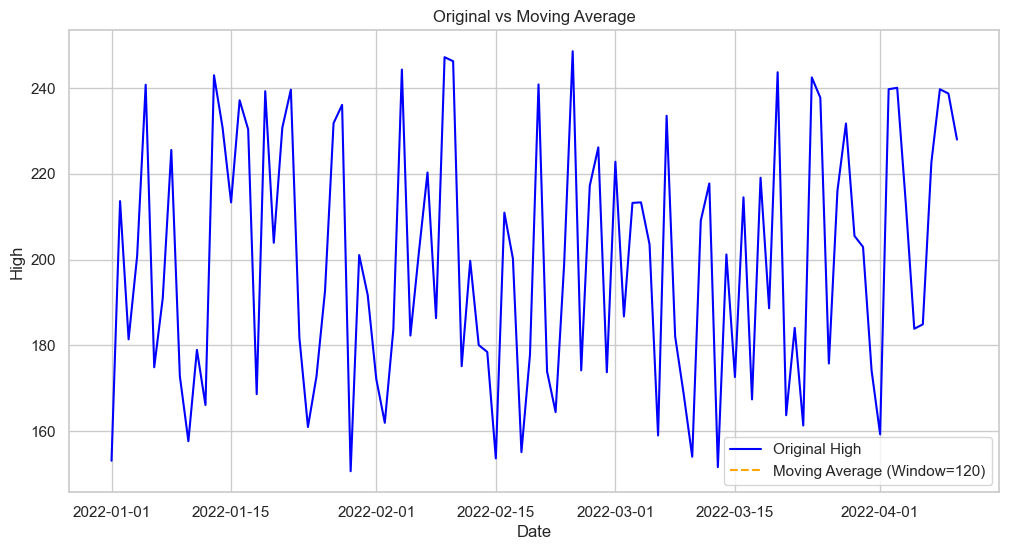

In [57]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [59]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())

                  High  high_diff
Date                             
2022-01-01  153.142919        NaN
2022-01-02  213.641041  60.498123
2022-01-03  181.435598 -32.205443
2022-01-04  200.857069  19.421471
2022-01-05  240.756647  39.899578


In [61]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2022-01-02    60.498123
2022-01-03   -32.205443
2022-01-04    19.421471
2022-01-05    39.899578
2022-01-06   -65.827424
Name: high_diff, dtype: float64

In [63]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -7.8658930252445725
p-value: 5.1361335489674616e-12
Critical Values: {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}
